In [1]:
import numpy as np
import pandas as pd
import random
import time
import sys
import os
from brian2 import *
import PIL 
from PIL import Image
import matplotlib.pyplot as plt
prefs.codegen.target = 'numpy'

In [2]:
trainData = pd.read_csv('mnist_train.csv', header=None)
trainImg = (trainData.iloc[:,1:]).values

In [3]:
examples_start = 0
examples_end = 1000
num_examples = (examples_end - examples_start)
duration = 50*num_examples*ms

In [4]:
Mode = 0
simNumber = 0
sim_Mode = "dse"
if (sim_Mode.lower() == "dse"):
    Mode = 1
    paramName = "tau_theta"
    simNumber = int(10)  ##模拟次数
    print("--- Entering Design Space Exploration Mode ---")

--- Entering Design Space Exploration Mode ---


In [5]:
start_point = "start"
N_Ip=784

In [6]:
def paramLoad(parameterfile):
    f = open(parameterfile,"r")
    lines = f.readlines()
    params = []
    for x in lines:
        params.append(x.split()[2])
    f.close()
    
    return params

In [7]:
for simCount in range(0,simNumber):
    
    start_time = time.time()
    
    if (Mode == 1):
        params = paramLoad('parameter/' + 'parameters_'+paramName+'_'+str(simCount)+'.txt')
    elif (Mode == 2):
        params = paramLoad('parameters_default.txt')
    else:
        break

In [8]:
rate_divider = float(params[0])*7

In [9]:
rate_divider

154.0

In [11]:
stimulus = TimedArray(np.vstack([[trainImg[c,:]] for c in range(examples_start, examples_end)]), dt=50*ms)

In [12]:
stimulus

In [13]:
Ip = PoissonGroup(N_Ip, rates = '(stimulus(t,i)/rate_divider)*Hz')

In [14]:
Ip

PoissonGroup(784, rates='(stimulus(t,i)/rate_divider)*Hz')

In [15]:
SpikeMon=SpikeMonitor(Ip)

In [16]:
SpikeNet= Network(Ip, SpikeMon)

In [17]:
SpikeNet

<Network at time t=0. s, containing objects: PoissonGroup(784, rates='(stimulus(t,i)/rate_divider)*Hz'), <SpikeMonitor, recording from spikemonitor>, Thresholder(clock=Clock(dt=100. * usecond, name='defaultclock'), when=thresholds, order=0, name='poissongroup_thresholder')>

In [18]:
SpikeNet.run(duration)

spikes_i=SpikeMon.i
spikes_t=SpikeMon.t

In [34]:
spikes_t_array = np.array(spikes_t)*10000

In [36]:
spikes_t_array.astype(int)

array([    25,     80,    166, ..., 499811, 499830, 499870])

In [37]:
len(spikes_t)

8335

In [25]:
spikes_t_array = np.array(spikes_t)*1000
spikes_array = np.zeros((500000))
spikes_array[spikes_t_array.astype(int)] = 1

In [26]:
len(spikes_array)

500000

In [27]:
spikes_array

array([0., 0., 1., ..., 0., 0., 0.])

In [37]:
spikes_arrays = np.reshape(spikes_array, (1000, 500))

In [67]:
rand_index = np.random.randint(len(lab_index[0]), size=ex_nums)

In [72]:
spikes_arrays[rand_index[0]]

IndexError: index 1331 is out of bounds for axis 0 with size 500

In [76]:
rand_index[index]

48

In [77]:
shape(spikes_arrays)

(500, 1000)

In [93]:
lab_index

(array([  5,  16,  25,  28,  76,  82, 109, 117, 120, 122, 143, 159, 161,
        171, 178, 180, 187, 189, 190, 199, 213, 220, 233, 252, 253, 262,
        268, 277, 308, 317, 318, 325, 339, 347, 360, 365, 375, 378, 381,
        385, 390, 391, 400, 410, 432, 444, 448, 457, 472, 476, 477, 493,
        515, 530, 548, 551, 555, 558, 563, 568, 570, 584, 588, 591, 619,
        642, 646, 650, 657, 664, 673, 674, 684, 688, 693, 696, 713, 714,
        716, 732, 774, 801, 807, 813, 814, 830, 844, 854, 862, 863, 866,
        873, 893, 907, 917, 931, 938, 946, 989], dtype=int64),)

In [94]:
rand_index

array([52, 60, 43, 72, 13, 76,  7, 82, 30, 48])

In [97]:
mean(spikes_arrays[:,rand_index[1]])

0.098

In [98]:
mean(spikes_arrays[:,rand_index[3]])

0.088

In [109]:
rand_index

array([97, 96,  3, 69, 19, 34, 15, 34, 25, 90])

In [112]:
784/9

87.11111111111111

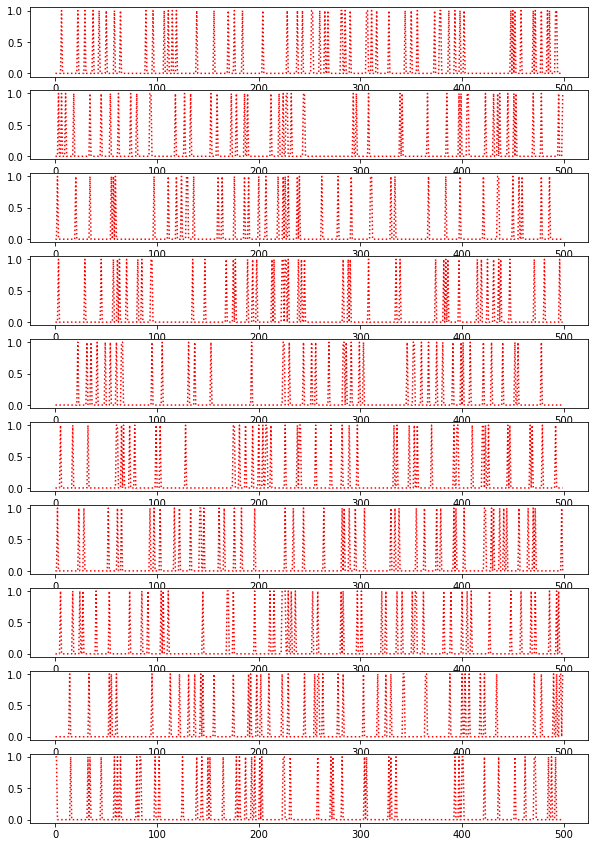

In [111]:
nums = 1
labels = np.array(trainData[0][0:1000])
ex_nums = 10
lab_index = np.where(labels==nums)
rand_index = np.random.randint(len(lab_index[0]), size=ex_nums)
plt.figure(figsize=(ex_nums, 5*3))
for i in range(ex_nums):
    figure = plt.subplot(ex_nums, 1, i +1 )
    plt.plot(range(0,500), spikes_arrays[:,rand_index[i]], color='red', linestyle=':', label='spikes')
plt.show()

In [50]:
trainData[0][:20]

0     5
1     0
2     4
3     1
4     9
5     2
6     1
7     3
8     1
9     4
10    3
11    5
12    3
13    6
14    1
15    7
16    2
17    8
18    6
19    9
Name: 0, dtype: int64

In [65]:
spikes_arrays = np.reshape(spikes_array,(50, 10000))

In [71]:
mean(spikes_arrays[:,1001])

0.0

In [47]:
spikes_array[500000-50*4000:500000]

array([0., 0., 0., ..., 0., 0., 0.])

In [26]:
N_exc = int(params[1])
tau_exc = float(params[2])*ms
Vth_exc = float(params[3])*mV
Vr_exc = float(params[4])*mV
Ref_exc = float(params[5])*ms

In [27]:
 N_inh = float(params[6])
tau_inh = float(params[7])*ms
Vth_inh = float(params[8])*mV
Vr_inh = float(params[9])*mV
Ref_inh = float(params[10])*ms

In [28]:
tau_theta = float(params[11])*ms
del_theta = float(params[12])*mV

In [30]:
def NeuronGroups(N_exc, tau_exc, Vth_exc, Vr_exc, Ref_exc,
                N_inh, tau_inh, Vth_inh, Vr_inh, Ref_inh, 
                tau_theta, del_theta, spikes_i, spikes_t):
    
    
    #Input Layer
    SGG= SpikeGeneratorGroup(N_Ip, spikes_i, spikes_t)

    #Excitatory Layer
    eqs_exc = '''
    dv/dt = (-v)/tau_exc: volt (unless refractory)
    dtheta/dt = (-theta)/tau_theta: volt
    '''
    reset = '''
    v= Vr_exc
    theta+=del_theta
    '''
    Exc = NeuronGroup(N_exc, eqs_exc, threshold='v>(Vth_exc+theta)', reset=reset, refractory=Ref_exc, method='euler')
    StateMon_exc = StateMonitor(Exc, ('v','theta'), record=False)
    SpikeMon_exc = SpikeMonitor(Exc)


    #Inhibitory Layer
    eqs_inh = '''
    dv/dt = (-v)/tau_inh: volt (unless refractory)
    '''
    Inh = NeuronGroup(N_inh, eqs_inh, threshold='v>Vth_inh', reset='v=Vr_inh', refractory=Ref_inh, method='euler')
    StateMon_inh = StateMonitor(Inh, 'v', record=False)
    
    return (SGG, Exc, Inh, StateMon_exc, StateMon_inh)

In [31]:
SGG,Exc,Inh,StateMon_exc, StateMon_inh = NeuronGroups(N_exc, tau_exc, Vth_exc, Vr_exc, Ref_exc,
                                                      N_inh, tau_inh, Vth_inh, Vr_inh, Ref_inh, 
                                                      tau_theta, del_theta, spikes_i, spikes_t)

In [34]:
taupre = float(params[13])*ms
taupost = float(params[14])*ms
Apre = float(params[15])
Apost = float(params[16])
wmax = float(params[17])*mV                    
wmin = float(params[18])*mV
nu_pre = float(params[19])
nu_post = float(params[20])

#Ip - Excitatory

weights = np.zeros((N_exc,784))

if (start_point.lower() == "continue"):
    if os.path.exists('trainedWeights.csv'):
        weights = weightLoad('trainedWeights.csv')
    else:
        weights.fill(1e-4)

elif (start_point.lower() == "start"): 
    weights.fill(1e-4)


#Excitatory - Inhibitory

we2i = float(params[21])*mV
wi2e = float(params[22])*mV

#Build Synapse Groups with parameters

In [35]:
def SynapseGroups(N_exc,taupre, taupost, Apre, Apost, wmax, wmin, nu_pre, nu_post,
                 weights, we2i, wi2e):
    
    #Delays

    minDelay_S1 = 0*ms
    maxDelay_S1 = 10*ms
    delDelay_S1 = maxDelay_S1-minDelay_S1

    minDelay_S2 = 0*ms
    maxDelay_S2 = 5*ms
    delDelay_S2 = maxDelay_S2-minDelay_S2

    minDelay_S3 = 0*ms
    maxDelay_S3 = 1*ms
    delDelay_S3 = maxDelay_S3-minDelay_S3

    #Input-Excitatory

    S1=Synapses(SGG, Exc, '''
             w : volt
             dapre/dt = -apre/taupre : volt (event-driven)
             dapost/dt = -apost/taupost : volt (event-driven)
             ''',
             on_pre='''
             v_post += w
             apre =Apre*mV
             w = clip(w+nu_pre*apost,0,wmax)
             ''',
             on_post='''
             apost =Apost*mV
             w = clip(w+nu_post*apre,0,wmax)
             ''')

    S1.connect(True)
    S1.delay = 'minDelay_S1+rand()*delDelay_S1'
    for neuron in range(0,N_exc):
        S1.w[:,neuron] = (weights[neuron])*volt


    StateMon_S1 = StateMonitor(S1, ['w', 'apre', 'apost'], record=S1[400,90])


    #Excitatory-Inhibitory

    S2 = Synapses(Exc, Inh, 'w : volt', on_pre = 'v_post+=w')
    S2.connect(j ='i')
    S2.w = we2i
    S2.delay = 'minDelay_S2+rand()*delDelay_S2'


    #Inhibtory-Excitatory

    S3 = Synapses(Inh, Exc, 'w : volt', on_pre = 'v_post-=w')
    S3.connect(condition ='j!=i')
    S3.w = wi2e
    S3.delay = 'minDelay_S3+rand()*delDelay_S3'
    
    return (S1, S2, S3, StateMon_S1)

In [36]:
S1, S2, S3, StateMon_S1 = SynapseGroups(N_exc, taupre, taupost, Apre, Apost, wmax, wmin, nu_pre, nu_post, weights, we2i, wi2e)

In [37]:
SNNet = Network(SGG,Exc,Inh,S1,S2,S3,StateMon_exc, StateMon_inh, StateMon_S1)
SNNet.run(duration)

In [39]:
def RFMonitor(N_exc,S1,cmap):
    grid = np.zeros((N_exc,28,28))
    for x in range(0,N_exc):
    	grid[x] = np.array(S1.w[:,x].reshape(28,28))



    fig1, axes = pyplot.subplots(nrows=10, ncols=10, sharex = 'col', sharey = 'row', figsize=(8,8))

    for x in range(0,10):
        for y in range(0,10):
             im = axes[x,y].imshow(grid[(x*10)+y], interpolation ='none', aspect = 'auto', cmap=cmap)

    fig1.colorbar(im, ax = axes.ravel().tolist())
    return fig1

In [40]:
figure = RFMonitor(N_exc,S1,'YlOrRd')
if(sim_Mode.lower() == "dse"):
    figure.suptitle(paramName+' = value '+str(simCount))
if(sim_Mode.lower() == "standalone"):
    figure.suptitle('All current default values')
figfile.savefig(figure)

In [42]:
def SaveWeights(N_exc):
    trainedWeights=np.zeros((N_exc,784))
    for m in range(0,N_exc):
    	trainedWeights[m]=np.array(S1.w[:,m])
    if os.path.exists('trainedWeights.csv'):
        os.remove('trainedWeights.csv')
    np.savetxt('trainedWeights.csv', trainedWeights, delimiter=",")
    
    return

In [43]:
SaveWeights(N_exc)
if(sim_Mode.lower() == "dse"):
    os.rename('trainedWeights.csv', 'trainedWeights_'+paramName+'_'+str(simCount)+'.csv')

if(sim_Mode.lower() == "dse"):
    print("--- Simulation %s completed in %s (s) ---" % (simCount, (time.time() - start_time)))


figfile.close()

--- Simulation 9 completed in 18843.0593419075 (s) ---
